# Comparison of sparsity and selectivity over training in BP, BTSP, and Hebbian networks

## 0. Setup

In [1]:
import torch
from torch.utils.data import DataLoader
from pprint import pprint
import matplotlib.pyplot as plt
from copy import deepcopy

from EIANN import Network
import EIANN.utils as ut
import EIANN.plot as pt

pt.update_plot_defaults()

input_size = 21
dataset = torch.eye(input_size) #each row is a different pattern
target = torch.eye(dataset.shape[0])

data_seed = 0
data_generator = torch.Generator()
sample_indexes = torch.arange(len(dataset))
dataloader = DataLoader(list(zip(sample_indexes, dataset, target)), 
                        shuffle=True, 
                        generator=data_generator)

test_dataloader = DataLoader(list(zip(sample_indexes, dataset, target)), 
                             batch_size = 21)
epochs=300
seed=42

weight_seeds = [65793, 65794, 65795, 65796, 65797] 
data_seeds = [257, 258, 259, 260, 261]

seed = weight_seeds[0]
data_seed = data_seeds[0]

## 1. Create networks

In [2]:
param_history_dict = {'bpDale': {},
                      'btsp': {}}
final_activity_dict = deepcopy(param_history_dict)

### Dale's Law Backprop (1 inh)

Epochs:   0%|          | 0/300 [00:00<?, ?it/s]

Epochs:   0%|          | 0/300 [00:00<?, ?it/s]

Epochs:   0%|          | 0/300 [00:00<?, ?it/s]

Epochs:   0%|          | 0/300 [00:00<?, ?it/s]

Epochs:   0%|          | 0/300 [00:00<?, ?it/s]

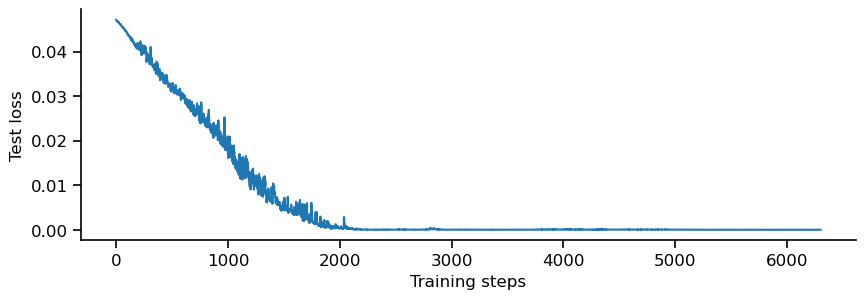

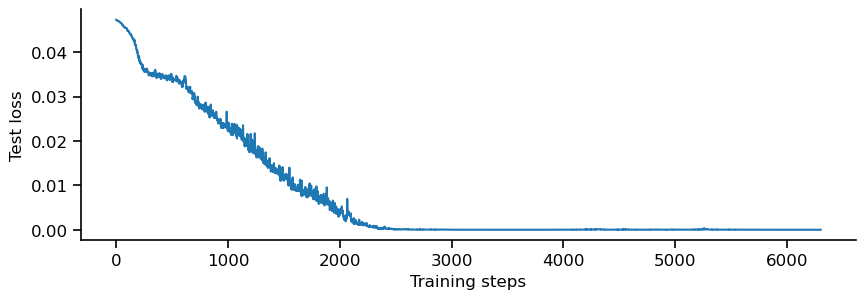

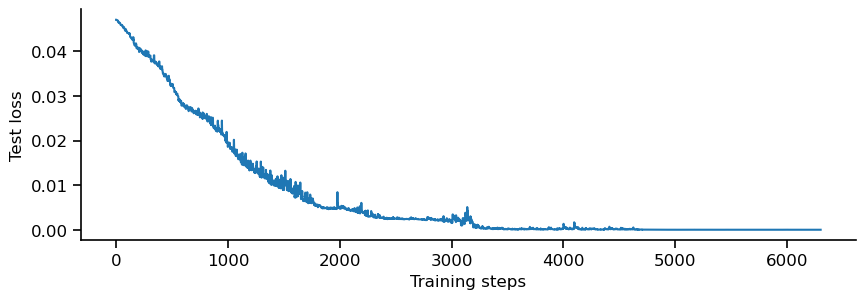

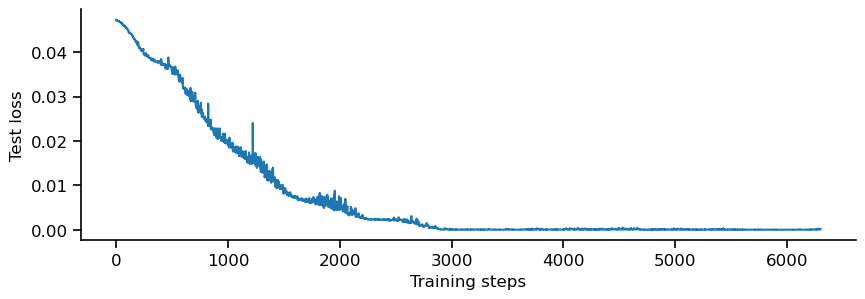

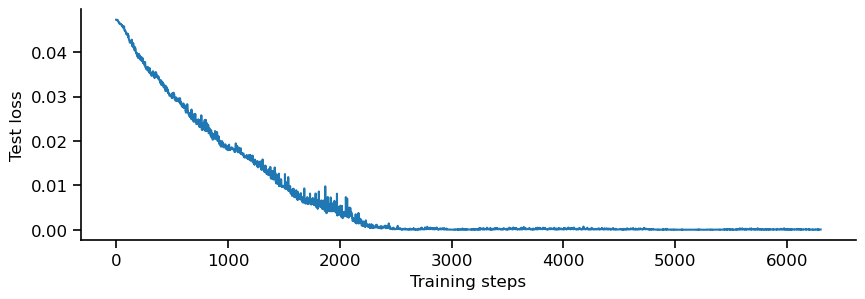

In [3]:
for i,(seed,data_seed) in enumerate(zip(weight_seeds,data_seeds)):
    network_config = ut.read_from_yaml('../config/loss_landscape_analysis/EIANN_1_hidden_backprop_1_inh_softplus_SGD_config_B.yaml')
    layer_config = network_config['layer_config']
    projection_config = network_config['projection_config']
    training_kwargs = network_config['training_kwargs']

    bpDale_network = Network(layer_config, projection_config, seed=seed, **training_kwargs)

    data_generator.manual_seed(data_seed)
    bpDale_network.train(dataloader, epochs, store_history=True, store_params=True, status_bar=True)

    for layer in bpDale_network: #swap to ReLU activation to make loss comparable across networks
        for population in layer:
            population.activation = torch.nn.ReLU()

    bpDale_network.reset_history()
    pt.plot_test_loss_history(bpDale_network, test_dataloader, store_history=True)
    
    param_history_dict['bpDale'][i] = deepcopy(bpDale_network.param_history)
    final_activity_dict['bpDale'][i] = deepcopy(bpDale_network.H1.E.activity_history[-1,-1])


### BTSP (1 inh)

Epochs:   0%|          | 0/300 [00:00<?, ?it/s]

Epochs:   0%|          | 0/300 [00:00<?, ?it/s]

Epochs:   0%|          | 0/300 [00:00<?, ?it/s]

Epochs:   0%|          | 0/300 [00:00<?, ?it/s]

Epochs:   0%|          | 0/300 [00:00<?, ?it/s]

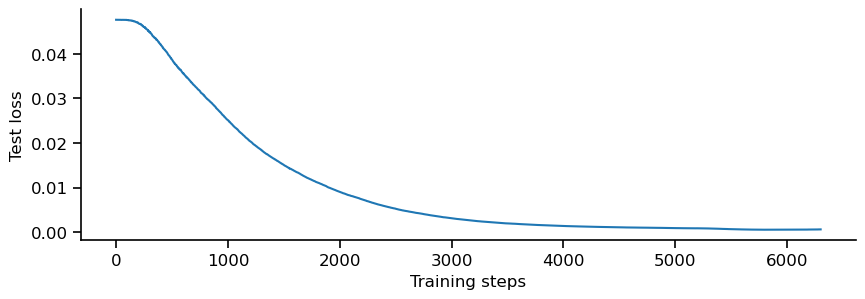

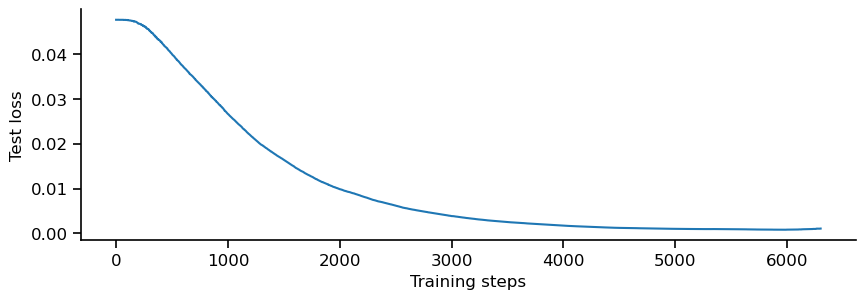

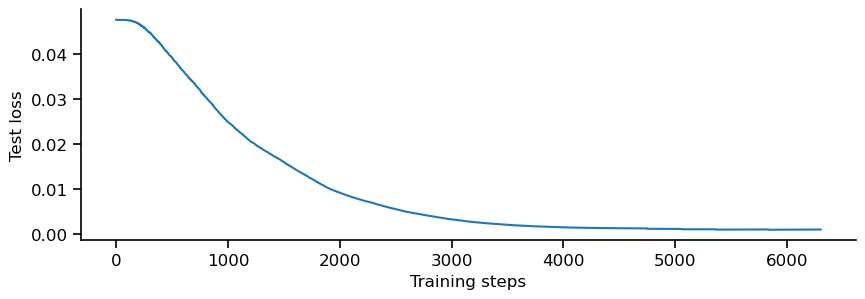

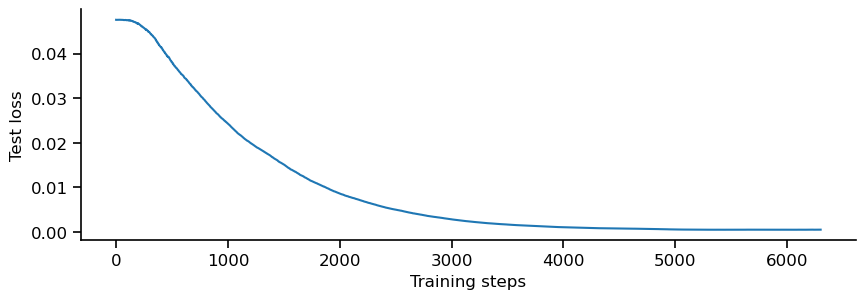

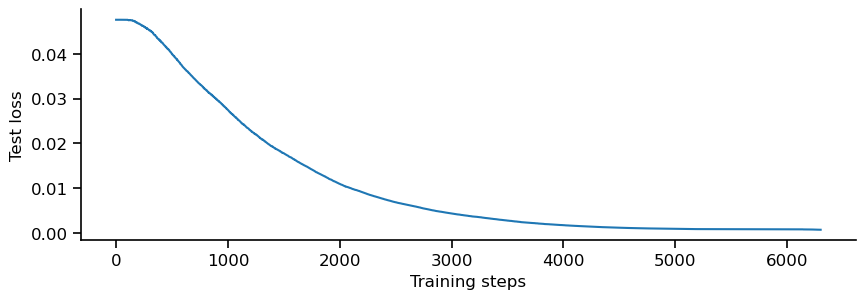

In [4]:
for i,(seed,data_seed) in enumerate(zip(weight_seeds,data_seeds)):
#     network_config = ut.read_from_yaml('../config/loss_landscape_analysis/20221104_EIANN_1_hidden_BTSP_config_B.yaml')
    network_config = ut.read_from_yaml('../config/loss_landscape_analysis/20221107_EIANN_1_hidden_BTSP_config_C.yaml')
    layer_config = network_config['layer_config']
    projection_config = network_config['projection_config']
    training_kwargs = network_config['training_kwargs']

    btsp_network = Network(layer_config, projection_config, seed=seed, **training_kwargs)

    data_generator.manual_seed(data_seed)
    btsp_network.train(dataloader, epochs, store_history=True, store_params=True, status_bar=True)

    btsp_network.reset_history()
    pt.plot_test_loss_history(btsp_network, test_dataloader, store_history=True)
    
    param_history_dict['btsp'][i] = deepcopy(btsp_network.param_history)
    final_activity_dict['btsp'][i] = deepcopy(btsp_network.H1.E.activity_history[-1,-1])



## 2. Analyze Loss Landscape

### Swap hidden units to maximize weight similarity

In [5]:
# reference_activity = deepcopy(final_activity_dict['bpDale'][0])
# plt.imshow(reference_activity)

In [6]:
# for model_name in final_activity_dict:
#     for i in final_activity_dict[model_name]:
#         activity = final_activity_dict[model_name][i]
        
#         # 1. find sorting order of hidden units that best matches reference network
        
        
#         # 2. re-sort weight matrices to/form hidden units according to new sorting

In [7]:
# from sklearn.metrics.pairwise import cosine_similarity
# import numpy as np

# plt.imshow(activity)
# plt.show()

# sort_idx = []
# num_units = activity.shape[1]
# num_patterns = activity.shape[0]

# for unit in reference_activity.T:
#     combined_mat = torch.cat([unit.unsqueeze(0),activity.T])
#     similarity = cosine_similarity(combined_mat)    
#     most_similar = np.argmax(similarity[0][1:])
#     sort_idx.append(most_similar)
    

### Plot PCA and Loss Landscape

In [8]:
# # Remove BTSP-specific parameters (Dend_I)
# bp_dict_keys = bpDale_network.state_dict().keys()
# for param_history in param_history_dict['btsp'].values():
#     for i,state_dict in enumerate(param_history):
#         state_dict_subset = {key: state_dict[key] for key in bp_dict_keys}
#         param_history[i] = state_dict_subset

In [9]:
# flat_param_history_all = []

# for network_name in param_history_dict:
#     for i in param_history_dict[network_name]:
#         flat_param_history, param_metadata = get_flat_param_history(param_history_dict[network_name][i])
#         flat_param_history_all.append(flat_param_history)  
# flat_param_history_all = torch.cat(flat_param_history_all)

# pt.plot_param_history_PCs(flat_param_history_all)

## Plot final weight histograms

In [10]:
# # Remove BTSP-specific parameters (Dend_I)
# bp_dict_keys = bpDale_network.state_dict().keys()
# for i,state_dict in enumerate(btsp_network.param_history):
#     state_dict_subset = {key: state_dict[key] for key in bp_dict_keys}
#     btsp_network.param_history[i] = state_dict_subset
    
# flat_param_hist_btsp,_ = pt.get_flat_param_history(btsp_network.param_history)
# pt.plot_param_history_PCs(flat_param_hist_btsp)

In [29]:
for i in final_state_dict:
    print(i)

module_dict.H1E_InputE.weight
module_dict.H1E_H1FBI.weight
module_dict.H1E_H1Dend_I.weight
module_dict.H1E_OutputE.weight
module_dict.H1FBI_H1E.weight
module_dict.H1Dend_I_H1E.weight
module_dict.OutputE_H1E.weight
module_dict.OutputE_OutputFBI.weight
module_dict.OutputFBI_OutputE.weight
parameter_dict.H1E_bias
parameter_dict.H1FBI_bias
parameter_dict.H1Dend_I_bias
parameter_dict.OutputE_bias
parameter_dict.OutputFBI_bias


In [34]:
weights_dict = {}

for network_name in param_history_dict:
    all_weights = []
    for i in param_history_dict[network_name]:
        final_state_dict = param_history_dict[network_name][i][-1]
        for param_name in final_state_dict:
#             if 'weight' in param_name and 'FBI' not in param_name and 'Dend' not in param_name:
            if param_name in ['module_dict.OutputE_H1E.weight','module_dict.H1E_InputE.weight']:
                flat_weights = final_state_dict[param_name].flatten()
                all_weights.append(flat_weights)
    weights_dict[network_name] = torch.cat(all_weights)

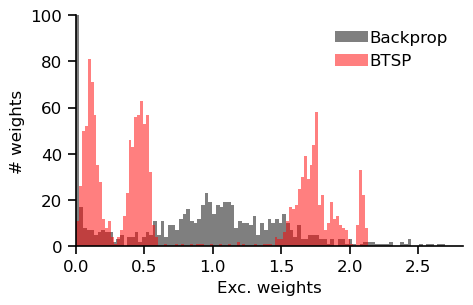

In [38]:
fig = plt.figure(figsize=(5,3))
plt.hist(weights_dict['bpDale'],100,color='k',alpha=0.5,label='Backprop')
plt.hist(weights_dict['btsp'],100,color='r',alpha=0.5,label='BTSP')
# plt.title('Weight distributions')
plt.legend()
plt.ylim(top=100)
plt.xlim(left=0)
plt.xlabel('Exc. weights')
plt.ylabel('# weights')
plt.show()

fig.savefig('figures/weight_distribution.svg',dpi=300)
fig.savefig('figures/weight_distribution.png',dpi=300)